In [51]:
import pandas as pd
import numpy as np
import xarray as xr
import datetime as dt
import glob
import os
from pathlib import Path
import HydroErr as he
import matplotlib.pyplot as plt
import hydrostats
import warnings as wg


from hydrostats.metrics import mae, r_squared, nse, kge_2012, rmse, pearson_r

import hydrostats.analyze as ha
from scipy import stats

wg.filterwarnings('ignore')

In [56]:
places = pd.read_csv(r'D:\Capstone\all_places_vegetation.csv')
places.sort_values(by='Best',ascending=False,inplace=True)
places.reset_index(inplace=True)
places

,index,folder,name,Fluxnet,Location,Lat,Lon,plant,Timeframe,Years,cat3,Clark,Best,Column1,Hobeichi,IA
0,15,Mopane,Mopane,BW-Ma1,Botswana,-19.92,23.5603,Savannas,1999–2001,3,Savannas,Savannas,Woody savanna,WSA,Woody savannas,Savanna
1,9,Howard,Howard,AU-How,Australia,-12.49,131.1520,Savannas,2001–2013,4,Savannas,Savannas,Woody savanna,WSA,Woody savannas,Savanna
2,12,Kruger,Kruger,ZA-Kru,South Africa,-25.02,31.4969,Savannas,2000–2010,2,Savannas,Savannas,Savannas,SAV,Savannas,Savanna
3,14,Merbleue,Merbleue,CA-Mer,"Ontario, Canada",45.41,-75.5187,Permanent Wetlands,1998–2013,7,Wetland,Permanent Wetlands,Permanent Wetlands,WET,Wetlands,Wetland
4,17,Sylvania,Sylvania,US-Syv,US,46.24,-89.3477,Mixed Forests,2001–2009,4,Forest,Deciduous broadleaf forest,Mixed forest,MF,Mixed forests,Forest
5,0,Amplero,Amplero,IT-Amp,Italy,41.90,13.6052,Croplands,2002–2008,4,Short,Croplands,Grassland,GRA,Grasslands,Short_Vegetation
6,2,Bugac,Bugac,HU-Bug,Hungary,46.69,19.6017,Croplands,2002–2008,4,Short,Croplands,Grassland,GRA,Grasslands,Short_Vegetation
7,6,FortPeck,FortPeck,US-FPe,"Montana, USA",48.31,-105.1020,Grasslands,1999–2013,7,Short,Grassland,Grassland,GRA,Grasslands,Short_Vegetation
8,11,Hyytiala,Hyytiala,FI-Hyy,Finland,61.85,24.2948,Evergreen Needleleaf,1996–2013,4,Forest,Closed needleleaf forest,Evergreen needleleaf,ENF,Evergreen needleleaf forest,Forest
9,13,Loobos,Loobos,NL-Loo,Netherlands,52.17,5.7440,Evergreen Needleleaf,1996–2013,10,Forest,Closed needleleaf forest,Evergreen needleleaf,ENF,Evergreen needleleaf forest,Forest


In [57]:
lista_places = places['Fluxnet']
code_fluxnet =[]
for lp in lista_places:
    aux = lp.split('-')[-1]
    code_fluxnet.append(aux)


code_fluxnet

['Ma1',
 'How',
 'Kru',
 'Mer',
 'Syv',
 'Amp',
 'Bug',
 'FPe',
 'Hyy',
 'Loo',
 'Ho1',
 'Blo',
 'ES1',
 'Esp',
 'Pag',
 'Tum',
 'Hes',
 'Ha1',
 'UMB',
 'ES2']

In [58]:
ds = xr.open_dataset(r'D:\HYDRO_MODELLING\plumber\plumber_diagnostics\data\pals_data\netcdf\AmpleroFluxnet.1.4_met.nc')
ds

<xarray.Dataset>
Dimensions:           (x: 1, y: 1, time: 70128, z: 1)
Coordinates:
  * x                 (x) float64 1.0
  * y                 (y) float64 1.0
  * time              (time) datetime64[ns] 2003-01-01T00:30:00 ... 2007-01-01
  * z                 (z) float64 1.0
Data variables: (12/18)
    latitude          (y, x) float32 ...
    longitude         (y, x) float32 ...
    SWdown            (time, y, x) float32 ...
    Tair              (time, z, y, x) float32 ...
    Rainf             (time, y, x) float32 ...
    Qair              (time, z, y, x) float32 ...
    ...                ...
    Qair_qc           (time, y, x) float64 ...
    Wind_qc           (time, y, x) float64 ...
    PSurf_qc          (time, y, x) float64 ...
    LWdown_qc         (time, y, x) float64 ...
    elevation         (y, x) float32 ...
    reference_height  (y, x) float32 ...
Attributes:
    Production_time:                  2012-09-27 11:34:52
    Production_source:                PALS automated netcdf conversion
    PALS_fluxtower_template_version:  1.0.2
    PALS_dataset_name:                AmpleroFluxnet
    PALS_dataset_version:             1.4
    Contact:                          palshelp@gmail.com

In [59]:
def calculate_heat_vaporization(temp):
    # Following Dingman

    lhv_mj = (2501 - 0.00236 * temp)  # MJ
    lhv_j = lhv_mj * 1000
    return lhv_j

def heat_vaporazation(place):
    """

    Updated for follow quality control
    :param place:
    :return:
    """
    direction = r'D:\HYDRO_MODELLING\plumber\plumber_diagnostics\data\pals_data\netcdf\{}Fluxnet.1.4_met.nc'.format(
        place)
    obs_nc = xr.open_dataset(direction)
    obs_nc_time = obs_nc.coords['time'].data

    # new
    t_qc = obs_nc['Tair_qc'].to_numpy()
    t_qc[t_qc == 0] = np.nan

    Tair = obs_nc['Tair'].to_numpy()
    ppt = obs_nc['Rainf'].to_numpy()
    
    dataset = pd.DataFrame(index=obs_nc_time)
    dataset['t'] = Tair.reshape(-1)
    dataset['qc'] = t_qc.reshape(-1)
    dataset['pptrate'] = ppt.reshape(-1)
    dataset['Tair'] = dataset['t'] * dataset['qc']
    dataset.drop(columns=['t', 'qc'], inplace=True)
    dataset['T_C'] = dataset['Tair'] - 273.15  # Kelvin to Celcius

    dataset['lhv'] = dataset.apply(lambda x: calculate_heat_vaporization(x['T_C']), axis=1)
    return dataset

def obs_file(place):
    """
    Updated adding quality control
    April 12, 2022
    :param place:
    :return:
    """
    direction = r'D:\HYDRO_MODELLING\plumber\plumber_diagnostics\data\pals_data\netcdf\{}Fluxnet.1.4_flux.nc'.format(
        place)
    obs_nc = xr.open_dataset(direction)
    obs_nc_time = obs_nc.coords['time'].data

    # qle = obs_nc['Qle'].to_dataframe(name='qle')

    # Updated
    qle_qc = obs_nc['Qle_qc'].to_numpy().reshape(-1)
    qle_qc[qle_qc == 0] = np.nan

    qle_data = obs_nc['Qle'].to_numpy().reshape(-1)
    qle = qle_qc * qle_data

    df_qle = pd.DataFrame(index=obs_nc_time, data=qle, columns=['Qle'])

    lhv = heat_vaporazation(place)

    df_obs = df_qle.join(lhv)
    df_obs['ET_mm_s'] = df_obs['Qle'] / df_obs['lhv']
    df_obs['ET_obs_mm_s'] = df_obs['ET_mm_s'] * -1
    return df_obs


def get_data(place):
    
    data = obs_file(place)
    
    

    return data

In [60]:
def get_annual(sdf,threshold=300):
    annual = sdf.resample('Y').sum()
    annual_count = sdf.resample('Y').count()
    col_annual = annual.columns.values
    col_annual0 = col_annual[0]
    annual_count['val'] = np.where((annual_count[col_annual0].ge(threshold)), 1, np.nan)
    
    df_anual = annual.join(annual_count, how='outer', rsuffix='c')
    
    for col in col_annual:
        df_anual[col] = df_anual[col] * df_anual['val']
    #df_anual.dropna()
    return df_anual


def process_data(place):

    sdf = get_data(place)
    #print(sdf)
    annual = get_annual(sdf,360)
    
    annual['ET'] = annual['ET_mm_s']/annual['pptrate']

    return annual 


def redefine_place():
    ldf = []
    for i in range(0, 20):
    
        place=places.loc[places.index == i, 'folder'].iloc[0]
        place_plant =places.loc[places.index == i, 'Best'].iloc[0]
        
        df= process_data(place)
        df.rename(columns={'ET':place},inplace=True)
        lista_temp = [place]
        df.drop(columns=[col for col in df if col not in lista_temp], inplace=True)
        ldf.append(df)
    bdf = pd.concat(ldf,axis=1)
    return bdf

            
def process_dataET(place):

    sdf = get_data(place)
    #print(sdf)
    annual = get_annual(sdf,365)
    
    annual['ET'] = annual['ET_mm_s']*86400*365

    return annual 


def redefine_placeET():
    ldf = []
    for i in range(0, 20):
    
        place=places.loc[places.index == i, 'folder'].iloc[0]
        place_plant =places.loc[places.index == i, 'Best'].iloc[0]
        
        df= process_dataET(place)
        df.rename(columns={'ET':place},inplace=True)
        lista_temp = [place]
        df.drop(columns=[col for col in df if col not in lista_temp], inplace=True)
        ldf.append(df)
    bdf = pd.concat(ldf,axis=1)
    return bdf


def process_dataPP(place):

    sdf = get_data(place)
    #print(sdf)
    annual = get_annual(sdf,365)
    
    annual['ET'] = annual['pptrate']*86400*365

    return annual 


def redefine_placePP():
    ldf = []
    for i in range(0, 20):
    
        place=places.loc[places.index == i, 'folder'].iloc[0]
        place_plant =places.loc[places.index == i, 'Best'].iloc[0]
        
        df= process_dataPP(place)
        df.rename(columns={'ET':place},inplace=True)
        lista_temp = [place]
        df.drop(columns=[col for col in df if col not in lista_temp], inplace=True)
        ldf.append(df)
    bdf = pd.concat(ldf,axis=1)
    return bdf


def process_dataRES(place):

    sdf = get_data(place)
    #print(sdf)
    annual = get_annual(sdf,360)
    
    annual['ET'] = annual['ET_mm_s']-annual['pptrate']

    return annual 


def redefine_placeRES():
    ldf = []
    for i in range(0, 20):
    
        place=places.loc[places.index == i, 'folder'].iloc[0]
        place_plant =places.loc[places.index == i, 'Best'].iloc[0]
        
        df= process_dataRES(place)
        df.rename(columns={'ET':place},inplace=True)
        lista_temp = [place]
        df.drop(columns=[col for col in df if col not in lista_temp], inplace=True)
        ldf.append(df)
    bdf = pd.concat(ldf,axis=1)
    return bdf

In [67]:
data_fraction = redefine_place()

In [ ]:
dataET = redefine_placeET()
dataPP = redefine_placePP()

In [62]:
dataRES = redefine_placeRES()

In [63]:
ET=dataET.mean()
PP =dataPP.mean()
PP

Mopane      4.706477e+06
Howard      3.222393e+07
Kruger      4.612039e+06
Merbleue    1.479952e+07
Sylvania    8.583393e+06
Amplero     1.495362e+07
Bugac       9.289338e+06
FortPeck    6.914544e+06
Hyytiala    8.068311e+06
Loobos      1.653962e+07
Howlandm    1.432487e+07
Blodgett    2.416510e+07
ElSaler     9.803709e+06
Espirra     1.156000e+07
Palang      3.630700e+07
Tumba       2.244662e+07
Hesse       1.648528e+07
Harvard     1.895783e+07
UniMich     1.078601e+07
ElSaler2    1.013478e+07
dtype: float64

In [64]:
names = list(PP.index)
names

['Mopane',
 'Howard',
 'Kruger',
 'Merbleue',
 'Sylvania',
 'Amplero',
 'Bugac',
 'FortPeck',
 'Hyytiala',
 'Loobos',
 'Howlandm',
 'Blodgett',
 'ElSaler',
 'Espirra',
 'Palang',
 'Tumba',
 'Hesse',
 'Harvard',
 'UniMich',
 'ElSaler2']

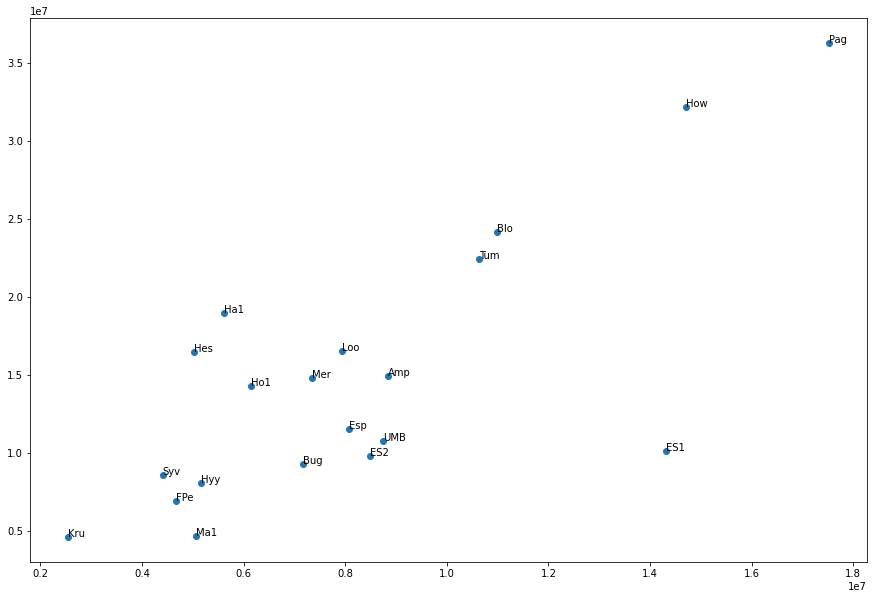

In [40]:
f, (ax1) = plt.subplots(1,1,figsize=(15,10))

ax1.scatter(ET,PP,label=PP.index)
for i, txt in enumerate(code_fluxnet):
    ax1.annotate(txt, (ET[i], PP[i]))
    


[Text(1, 0, 'Amp'),
 Text(2, 0, 'Blo'),
 Text(3, 0, 'Bug'),
 Text(4, 0, 'ES2'),
 Text(5, 0, 'ES1'),
 Text(6, 0, 'Esp'),
 Text(7, 0, 'FPe'),
 Text(8, 0, 'Ha1'),
 Text(9, 0, 'Hes'),
 Text(10, 0, 'How'),
 Text(11, 0, 'Ho1'),
 Text(12, 0, 'Hyy'),
 Text(13, 0, 'Kru'),
 Text(14, 0, 'Loo'),
 Text(15, 0, 'Mer'),
 Text(16, 0, 'Ma1'),
 Text(17, 0, 'Pag'),
 Text(18, 0, 'Syv'),
 Text(19, 0, 'Tum'),
 Text(20, 0, 'UMB')]

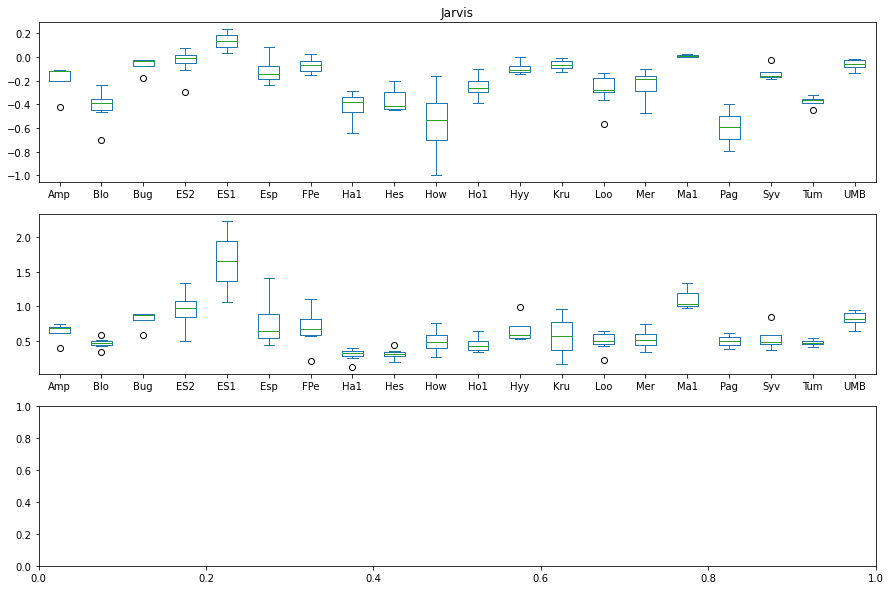

In [42]:
f, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,10))

#AX1 


dataRES.plot(kind='box', ax=ax1)
ax1.set_title('Jarvis')
ax1.set_xticklabels(code_fluxnet)

data_fraction.plot(kind='box',ax=ax2)
ax2.set_xticklabels(code_fluxnet)


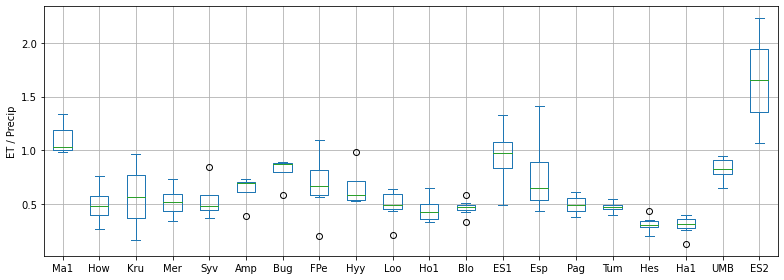

In [73]:
f, (ax1) = plt.subplots(1,1,figsize=(11,4))

data_fraction.plot(kind='box',ax=ax1)
ax1.set_xticklabels(code_fluxnet)
ax1.set_ylabel('ET / Precip')
ax1.grid()
f.tight_layout()    
plt.savefig(os.path.join(os.getcwd(),'Plots','Obs_ET_Precip.png'), dpi=500, bbox_inches='tight')